In [ ]:
import numpy as np## for transformations and outlier anaylsis
from sklearn.linear_model import LinearRegression
import pandas as pd # for extraction and reading 
import matplotlib.pyplot as ply
import matplotlib.style
import seaborn as sns

In [ ]:
data=pd.read_csv('car-mpg.csv')

In [ ]:
data.head(5)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


In [ ]:
data=data.drop("car_name",axis=1)

In [ ]:
data.head(5)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
0,18.0,8,307.0,130,3504,12.0,70,1,0
1,15.0,8,350.0,165,3693,11.5,70,1,0
2,18.0,8,318.0,150,3436,11.0,70,1,0
3,16.0,8,304.0,150,3433,12.0,70,1,0
4,17.0,8,302.0,140,3449,10.5,70,1,0


In [ ]:
data['origin']=data['origin'].replace({1:"US",2:"UK",3:"JAPAN"})#label encoding

In [ ]:
data.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
0,18.0,8,307.0,130,3504,12.0,70,US,0
1,15.0,8,350.0,165,3693,11.5,70,US,0
2,18.0,8,318.0,150,3436,11.0,70,US,0
3,16.0,8,304.0,150,3433,12.0,70,US,0
4,17.0,8,302.0,140,3449,10.5,70,US,0


In [ ]:
data=pd.get_dummies(data,columns=["origin"])

In [ ]:
data.head(5)

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_JAPAN,origin_UK,origin_US
0,18.0,8,307.0,130,3504,12.0,70,0,0,0,1
1,15.0,8,350.0,165,3693,11.5,70,0,0,0,1
2,18.0,8,318.0,150,3436,11.0,70,0,0,0,1
3,16.0,8,304.0,150,3433,12.0,70,0,0,0,1
4,17.0,8,302.0,140,3449,10.5,70,0,0,0,1


In [ ]:
data.describe()

,mpg,cyl,disp,wt,acc,yr,car_type,origin_JAPAN,origin_UK,origin_US
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,0.530151,0.198492,0.175879,0.625628
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.499718,0.399367,0.381197,0.484569
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,1.000000,0.000000,0.000000,1.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
car_type,398.0,0.530151,0.499718,0.0,0.000,1.0,1.000,1.0
origin_JAPAN,398.0,0.198492,0.399367,0.0,0.000,0.0,0.000,1.0
origin_UK,398.0,0.175879,0.381197,0.0,0.000,0.0,0.000,1.0
origin_US,398.0,0.625628,0.484569,0.0,0.000,1.0,1.000,1.0


In [ ]:
data.dtypes

mpg             float64
cyl               int64
disp            float64
hp               object
wt                int64
acc             float64
yr                int64
car_type          int64
origin_JAPAN      uint8
origin_UK         uint8
origin_US         uint8
dtype: object

In [ ]:
  data[data["hp"]=="?"]## for checking

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_JAPAN,origin_UK,origin_US
32,25.0,4,98.0,?,2046,19.0,71,1,0,0,1
126,21.0,6,200.0,?,2875,17.0,74,0,0,0,1
330,40.9,4,85.0,?,1835,17.3,80,1,0,1,0
336,23.6,4,140.0,?,2905,14.3,80,1,0,0,1
354,34.5,4,100.0,?,2320,15.8,81,1,0,1,0
374,23.0,4,151.0,?,3035,20.5,82,1,0,0,1


In [ ]:
data1=data.isnull().any(axis=0)
data2=data.isnull().any(axis=1)
print(data1,data2)

mpg             False
cyl             False
disp            False
hp              False
wt              False
acc             False
yr              False
car_type        False
origin_JAPAN    False
origin_UK       False
origin_US       False
dtype: bool 0      False
1      False
2      False
3      False
4      False
       ...  
393    False
394    False
395    False
396    False
397    False
Length: 398, dtype: bool


In [ ]:
data[data.isnull().any(axis=1)]

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_JAPAN,origin_UK,origin_US


In [ ]:
#data=data.hp.str.isdigit()

In [ ]:
data.drop('hp',axis=1,inplace=True)

In [ ]:
#data=data.apply(lambda X: X.fillna(X.median()),axis=0)

In [ ]:
data.describe()

,mpg,cyl,disp,wt,acc,yr,car_type,origin_JAPAN,origin_UK,origin_US
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,0.530151,0.198492,0.175879,0.625628
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.499718,0.399367,0.381197,0.484569
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,1.000000,0.000000,0.000000,1.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000,1.000000


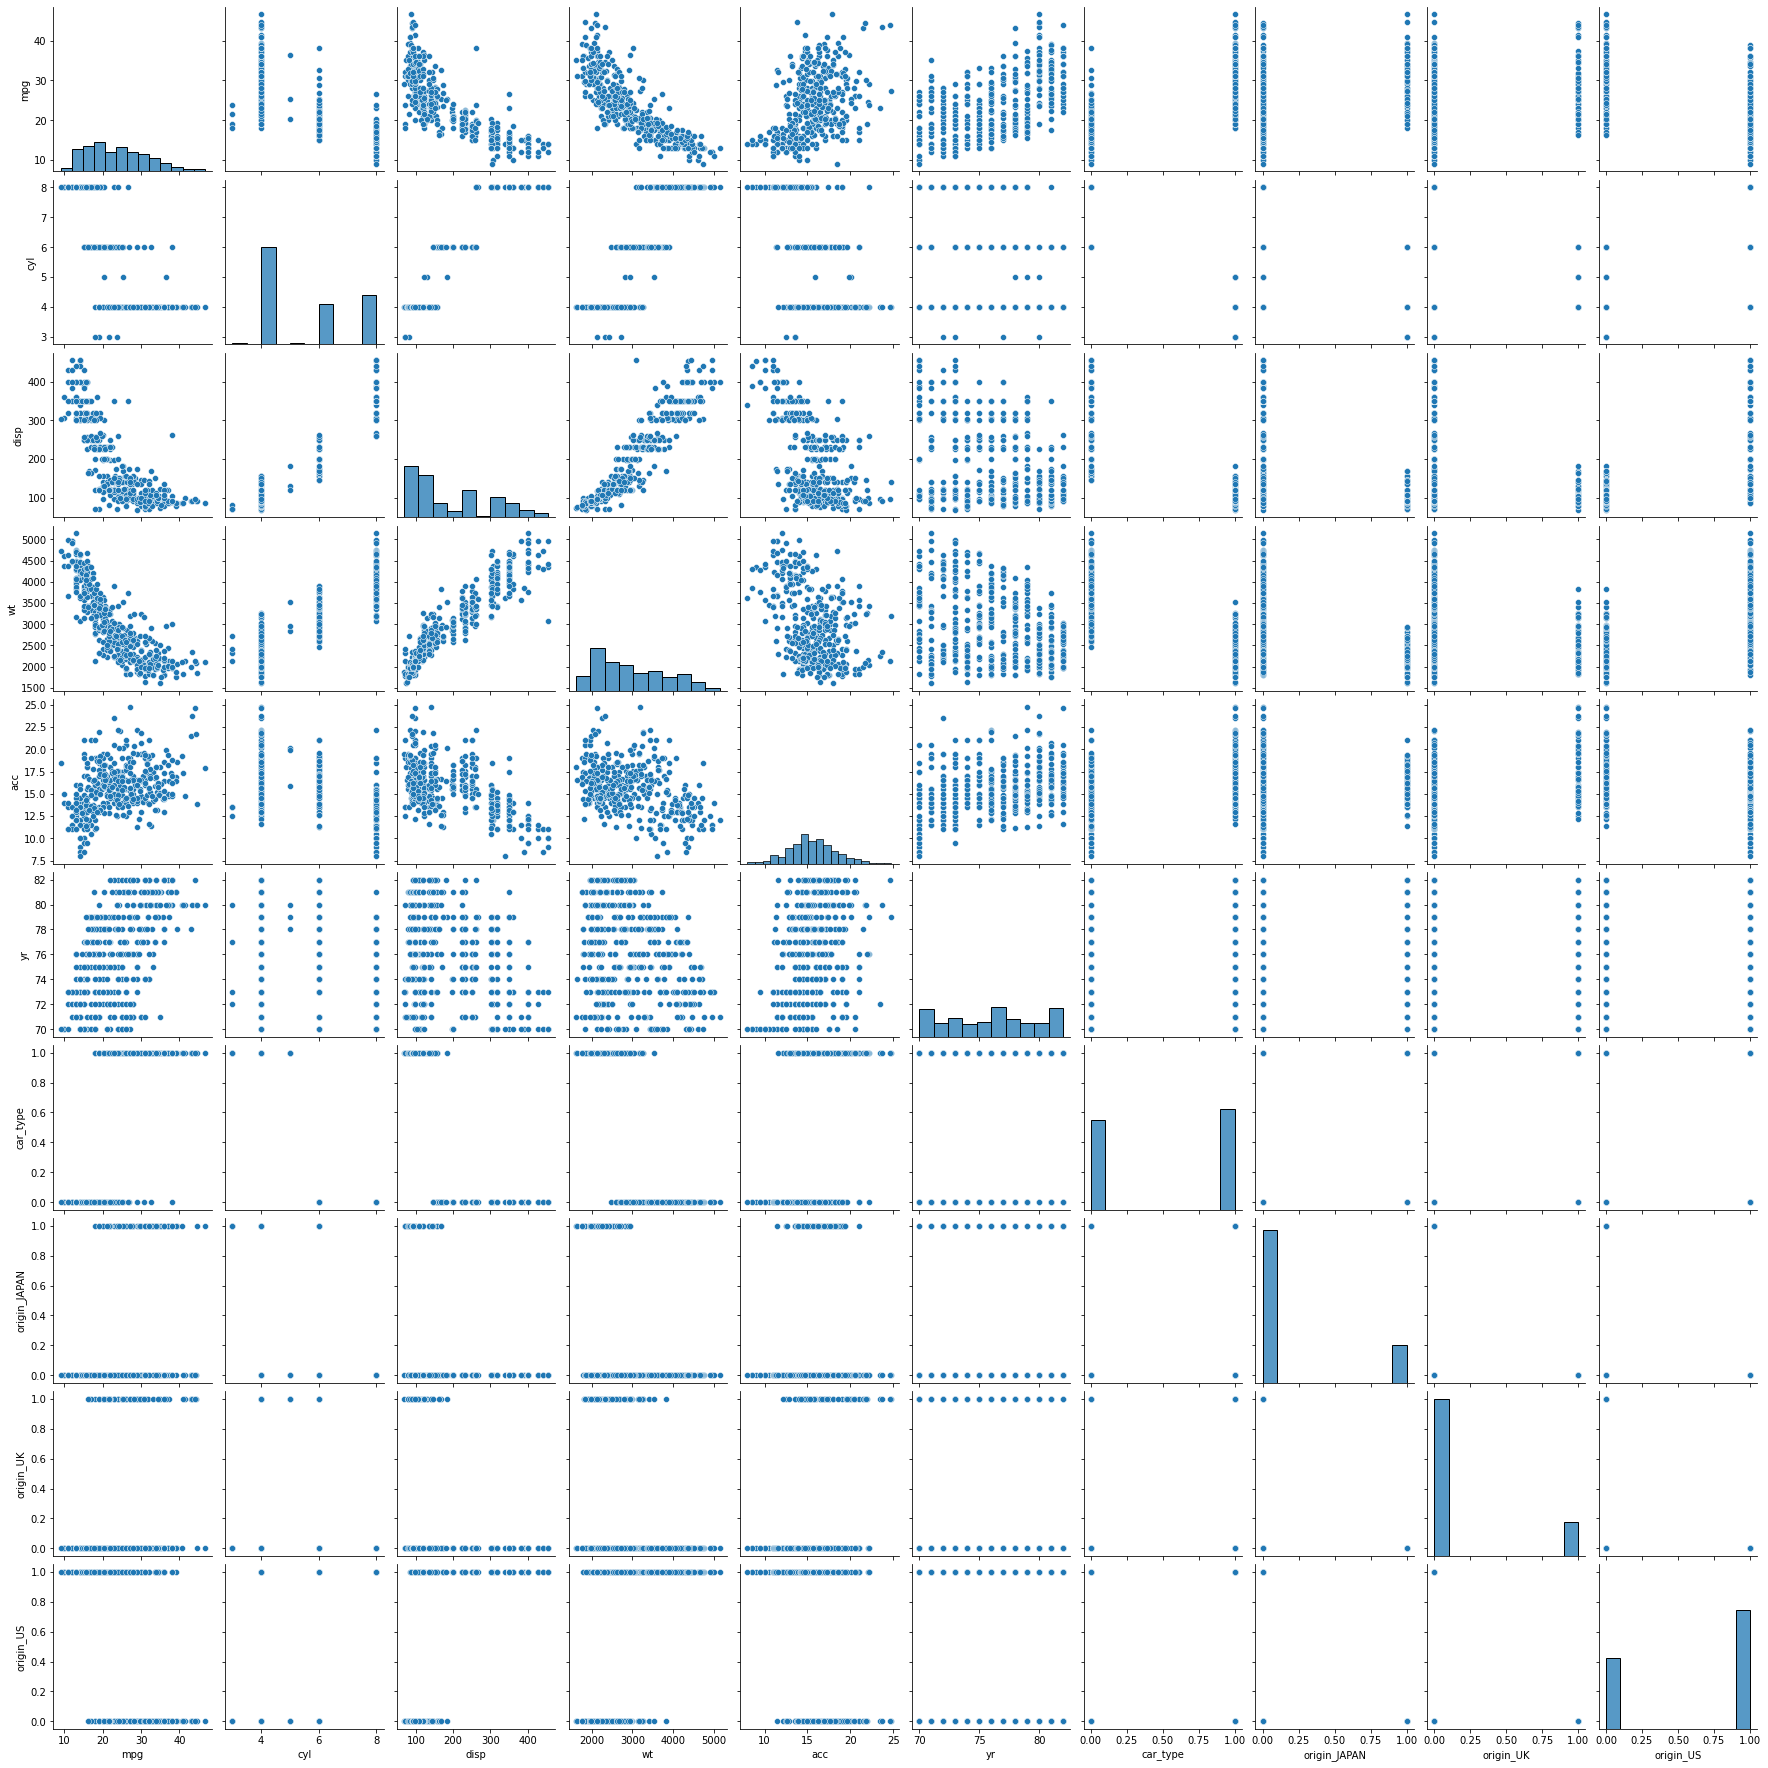

In [ ]:
sns.pairplot(data)

In [ ]:
X=data.drop("mpg",axis=1)

In [ ]:
y=data[['mpg']]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_test,X_train,y_test,y_train=train_test_split(X,y,test_size=0.25)# test size assimg test size ratio

In [ ]:
lor=LinearRegression()

In [ ]:
lor.fit(X_train,y_train)

LinearRegression()